In [1]:
from run_sim import run_sim
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# set up dataframe for collecting event data
mtd_stats, attack_stats = run_sim()

Target Node is:  91


In [3]:
print(mtd_stats.dict())
mtd_operation_record = pd.DataFrame(mtd_stats.mtd_operation_record)

mtd_operation_record

{'Total suspended MTD': 116, 'Total triggered MTD': 415, 'Total executed MTD': 299, 'Total attack interrupted': 216}


,name,start_time,finish_time,duration
0,IPShuffle,30.483514,81.114716,50.631202
1,CompleteTopologyShuffle,91.131300,161.736293,70.604993
2,IPShuffle,181.514401,232.630305,51.115904
3,serviceDiversity,211.528727,251.908916,40.380189
4,HostTopologyShuffle,242.190475,282.571710,40.381236
...,...,...,...,...
294,osdiversity,12536.368991,12567.031154,30.662163
295,CompleteTopologyShuffle,12504.672151,12575.133804,70.461653
296,HostTopologyShuffle,12596.969004,12637.246144,40.277140
297,UserShuffle,12627.261659,12637.371625,10.109966


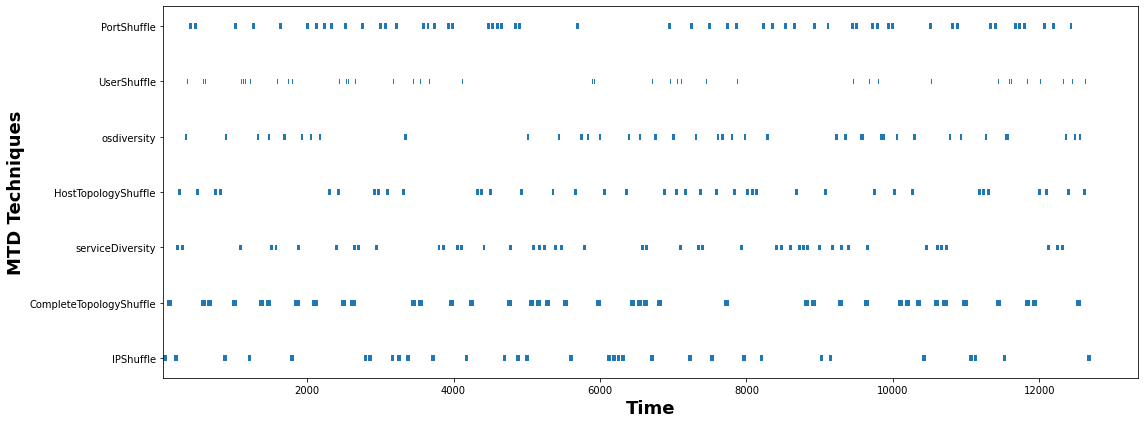

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(attack_stats.attack_operation_record)
attack_operation_record

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
0,SCAN_HOST,0.000000,5.000000,5.00000,,,-1,0,0,,0
1,ENUM_HOST,5.000000,7.000000,2.00000,,,-1,0,0,,0
2,SCAN_PORT,7.000000,17.000000,10.00000,,,0,1,0,,0
3,EXPLOIT_VULN,17.000000,48.165470,31.16547,,,0,1,0,0,0
4,SCAN_NEIGHBOR,48.165470,53.165470,5.00000,,,0,1,6,,1
...,...,...,...,...,...,...,...,...,...,...,...
1544,ENUM_HOST,12644.246144,12646.246144,2.00000,,,-1,2,873,,199
1545,SCAN_PORT,12646.246144,12656.246144,10.00000,,,19,2,873,19,199
1546,SCAN_NEIGHBOR,12656.246144,12661.246144,5.00000,,,19,2,873,,200
1547,ENUM_HOST,12661.246144,12663.246144,2.00000,,,19,2,873,,200


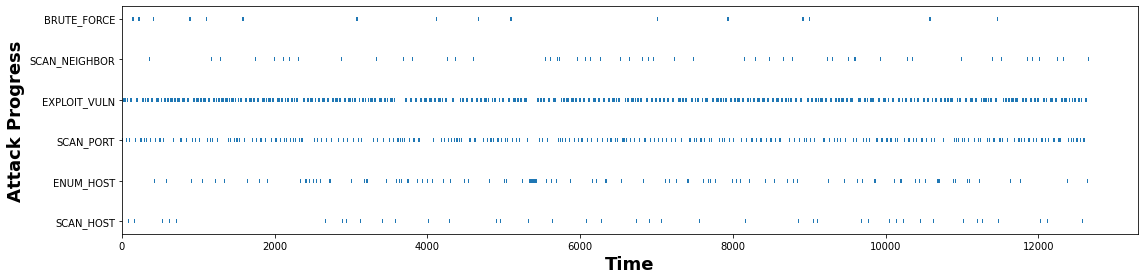

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
105,SCAN_PORT,1158.190019,1168.190019,10.0,,,38,1,191,38,9
390,SCAN_PORT,3612.961898,3622.961898,10.0,,,72,1,524,72,53
398,SCAN_PORT,3639.961898,3649.961898,10.0,,,76,1,524,76,54
497,SCAN_PORT,4354.170010,4364.170010,10.0,,,139,1,585,139,66
501,SCAN_PORT,4373.170010,4383.170010,10.0,,,132,1,585,132,67
557,SCAN_PORT,4818.777183,4828.777183,10.0,,,145,1,616,145,76
696,SCAN_PORT,5691.620602,5701.620602,10.0,,,121,1,631,121,89
700,SCAN_PORT,5715.585512,5725.585512,10.0,,,127,1,631,127,90
713,SCAN_PORT,5857.878074,5867.878074,10.0,,,133,1,664,133,92
910,SCAN_PORT,7427.533856,7437.533856,10.0,,,186,2,713,186,118


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts
3,EXPLOIT_VULN,17.000000,48.165470,31.165470,,,0,1,0,0,0
32,EXPLOIT_VULN,326.727557,357.545065,30.817507,,,52,3,47,52,1
41,EXPLOIT_VULN,446.294865,479.590468,33.295603,,,51,1,72,51,2
50,EXPLOIT_VULN,545.098472,576.939049,31.840577,,,37,1,106,37,3
58,EXPLOIT_VULN,635.362854,665.542346,30.179492,,,42,1,113,42,4
...,...,...,...,...,...,...,...,...,...,...,...
1462,EXPLOIT_VULN,11892.392394,11922.571067,30.178673,,,10,2,868,10,190
1470,EXPLOIT_VULN,11983.865323,12014.143097,30.277774,,,11,1,868,11,191
1492,EXPLOIT_VULN,12158.988320,12189.072615,30.084295,,,14,1,869,14,194
1498,EXPLOIT_VULN,12219.862414,12251.907593,32.045179,,,15,1,869,15,195


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,interrupted_in,interrupted_by,current_host,current_host_attempt,cumulative_attempts,compromise_host,cumulative_compromised_hosts


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)